In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data importing
DATA_DIR_PATH = '/Users/cindywang/PycharmProjects/nch_rop/data/'
adt_df = pd.read_csv(DATA_DIR_PATH + 'Batch1a/ADT.csv')
ec_df = pd.read_csv(DATA_DIR_PATH + 'Batch1a/Encounter_Characteristics.csv')
vitals_df = pd.read_csv(DATA_DIR_PATH + 'Batch1a/Vitals.csv')

In [3]:
adt_df.head()

,ENC_ID,DEPT_GROUP,DEPT_LOCATION,IN_DAY,IN_TIME,OUT_DAY,OUT_TIME
0,572839292,NICU,On campus,0,09:34:00,17,16:29:00
1,572839292,Periop,On campus,17,16:29:00,17,17:56:00
2,572839292,NICU,On campus,17,17:56:00,96,12:47:00
3,572839292,Periop,On campus,96,12:47:00,96,15:17:00
4,572839292,NICU,On campus,96,15:17:00,96,15:18:00


In [4]:
ec_df.head()

,ENC_ID,GEST_AGE_INDAYS,BIRTH_WT_INOUNCES,GENDER,ETHNICITY,RACE,AGE_AT_ADMIT,ADMIT_DAY,ADMIT_TIME,DISCH_DAY,DISCH_TIME
0,572839292,168,26.81,Female,Not Hispanic or Latino,White,5,0,09:34:00,164,16:56:00
1,572839294,180,34.39,Male,Not Hispanic or Latino,White,0,0,17:58:00,109,17:04:00
2,572839296,212,35.63,Female,Hispanic or Latino,White,0,0,15:53:00,75,19:33:00
3,572839301,183,30.51,Female,Not Hispanic or Latino,Black or African American,9,0,15:04:00,67,13:32:00
4,572839302,174,28.22,Male,Not Hispanic or Latino,Black or African American,0,0,15:43:00,155,16:28:00


In [6]:
vitals_df.head()

,ENC_ID,RECORDED_DAY,RECORDED_TIME,PULSE,NIBP,BP_S,BP_D,RESP,SPO2
0,572839292,0,09:40:00,140.0,NaN,NaN,NaN,NaN,88.0
1,572839292,0,09:45:00,148.0,NaN,NaN,NaN,NaN,92.0
2,572839292,0,09:50:00,150.0,NaN,NaN,NaN,NaN,94.0
3,572839292,0,09:55:00,154.0,30.0,48.0,22.0,NaN,97.0
4,572839292,0,09:56:00,139.0,32.0,50.0,22.0,NaN,91.0


## general summary stats

### patient info

In [11]:
ec_df.columns

Index(['ENC_ID', 'GEST_AGE_INDAYS', 'BIRTH_WT_INOUNCES', 'GENDER', 'ETHNICITY',
       'RACE', 'AGE_AT_ADMIT', 'ADMIT_DAY', 'ADMIT_TIME', 'DISCH_DAY',
       'DISCH_TIME'],
      dtype='object')

In [28]:
(ec_df['GEST_AGE_INDAYS']/7).describe()

count    923.000000
mean      28.774803
std        2.875804
min       22.000000
25%       26.428571
50%       29.285714
75%       31.285714
max       32.857143
Name: GEST_AGE_INDAYS, dtype: float64

Text(0.5, 1.0, 'distribution of patient race')

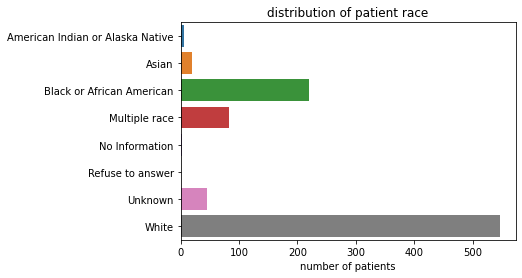

In [46]:
sns.barplot(data=ec_df.groupby('RACE').count().reset_index(), y='RACE', x='ENC_ID')
plt.ylabel('')
plt.xlabel('number of patients')
plt.title('distribution of patient race')

Text(0.5, 1.0, 'distribution of patient race')

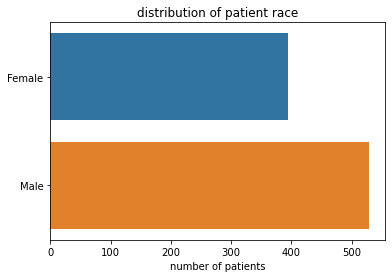

In [118]:
sns.barplot(data=ec_df.groupby('GENDER').count().reset_index(), y='GENDER', x='ENC_ID')
plt.ylabel('')
plt.xlabel('number of patients')
plt.title('distribution of patient race')

In [58]:
adt_df.columns

Index(['ENC_ID', 'DEPT_GROUP', 'DEPT_LOCATION', 'IN_DAY', 'IN_TIME', 'OUT_DAY',
       'OUT_TIME'],
      dtype='object')

In [59]:
vitals_df.columns

Index(['ENC_ID', 'RECORDED_DAY', 'RECORDED_TIME', 'PULSE', 'NIBP', 'BP_S',
       'BP_D', 'RESP', 'SPO2'],
      dtype='object')

In [117]:
# 
avg_pd_df = vitals_df.groupby(['ENC_ID', 'RECORDED_DAY']).std().reset_index()
avg_pd_df.head()

,ENC_ID,RECORDED_DAY,PULSE,NIBP,BP_S,BP_D,RESP,SPO2
0,572839292,0,13.156057,1.527525,3.055050,3.464102,NaN,2.475815
1,572839292,1,12.965738,NaN,NaN,NaN,NaN,4.931937
2,572839292,2,9.626007,NaN,NaN,NaN,NaN,3.807266
3,572839292,3,9.738837,NaN,NaN,NaN,NaN,3.102787
4,572839292,4,7.568047,0.707107,1.414214,1.414214,4.09878,3.350579


In [65]:
# averaging over patient per admit_day to then look at pulse, nibp, bp_s, bp_d, resp, spo2
avg_pd_df = vitals_df.groupby(['ENC_ID', 'RECORDED_DAY']).mean().reset_index()
avg_pd_df.head()

,ENC_ID,RECORDED_DAY,PULSE,NIBP,BP_S,BP_D,RESP,SPO2
0,572839292,0,152.491525,31.666667,47.333333,24.0,NaN,93.850000
1,572839292,1,156.375000,35.000000,45.000000,30.0,NaN,92.517857
2,572839292,2,153.164948,NaN,NaN,NaN,NaN,92.762887
3,572839292,3,162.020408,20.000000,38.000000,11.0,NaN,95.581633
4,572839292,4,169.840426,24.500000,33.000000,19.0,43.0,93.308511


Text(0, 0.5, 'number of patients')

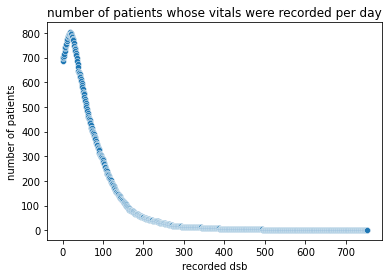

In [91]:
sns.scatterplot(data=avg_pd_df.groupby('RECORDED_DAY').count().reset_index(), x='RECORDED_DAY', y='ENC_ID')
plt.title('number of patients whose vitals were recorded per day')
plt.xlabel('recorded dsb')
plt.ylabel('number of patients')

Text(0, 0.5, 'number of patients')

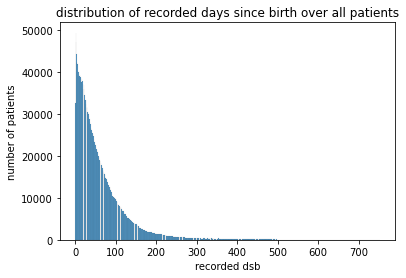

In [80]:
sns.histplot(vitals_df['RECORDED_DAY'])
plt.title('distribution of recorded days since birth over all patients')
plt.xlabel('recorded dsb')
plt.ylabel('number of patients')

In [81]:
vitals_df['RECORDED_DAY'].describe()

count    2.983739e+06
mean     6.136495e+01
std      6.744903e+01
min      0.000000e+00
25%      1.800000e+01
50%      4.200000e+01
75%      8.100000e+01
max      7.520000e+02
Name: RECORDED_DAY, dtype: float64

In [127]:
temp = vitals_df.groupby(['ENC_ID', 'RECORDED_DAY']).count().reset_index()
long_stay_ids = list(set(temp.loc[temp['RECORDED_DAY'] > 110]['ENC_ID']))
len(list(set(temp.loc[temp['RECORDED_DAY'] > 110]['ENC_ID'])))

229

In [126]:
229/923

0.24810400866738894

Text(0.5, 0, 'gestational age (wks)')

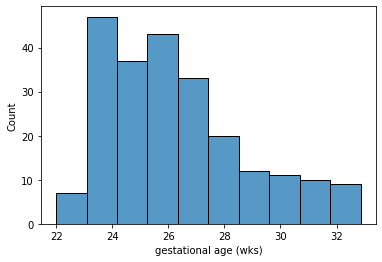

In [133]:
sns.histplot(ec_df.loc[ec_df['ENC_ID'].isin(long_stay_ids)]['GEST_AGE_INDAYS']/7)
plt.xlabel('gestational age (wks)')

Text(0, 0.5, 'blood pressure (diastole)')

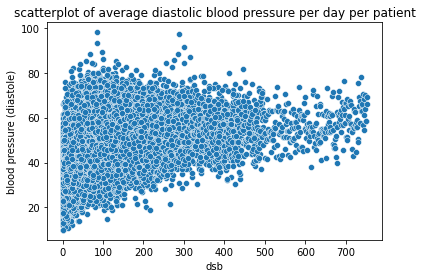

In [115]:
sns.scatterplot(data=avg_pd_df, x='RECORDED_DAY', y='BP_D')
plt.title('scatterplot of average diastolic blood pressure per day per patient')
plt.xlabel('dsb')
plt.ylabel('blood pressure (diastole)')

Text(0, 0.5, 'blood pressure (diastole)')

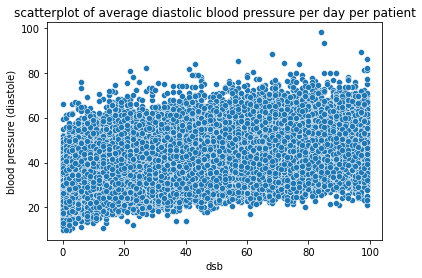

In [114]:
sns.scatterplot(data=avg_pd_df.loc[avg_pd_df['RECORDED_DAY'] < 100], x='RECORDED_DAY', y='BP_D')
plt.title('scatterplot of average diastolic blood pressure per day per patient')
plt.xlabel('dsb')
plt.ylabel('blood pressure (diastole)')

Text(0, 0.5, 'respiratory rate (breaths/min)')

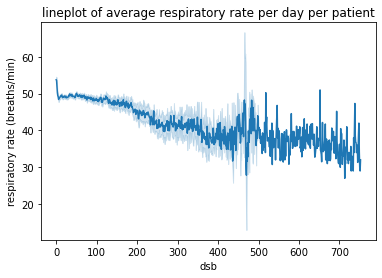

In [103]:
sns.lineplot(data=avg_pd_df, x='RECORDED_DAY', y='RESP')
plt.title('lineplot of average respiratory rate per day per patient')
plt.xlabel('dsb')
plt.ylabel('respiratory rate (breaths/min)')

Text(0, 0.5, 'respiratory rate (breaths/min)')

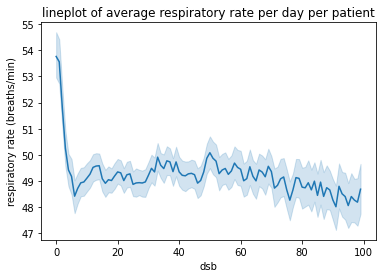

In [104]:
sns.lineplot(data=avg_pd_df.loc[avg_pd_df['RECORDED_DAY'] < 100], x='RECORDED_DAY', y='RESP')
plt.title('lineplot of average respiratory rate per day per patient')
plt.xlabel('dsb')
plt.ylabel('respiratory rate (breaths/min)')

In [60]:
vitals_df

,ENC_ID,RECORDED_DAY,RECORDED_TIME,PULSE,NIBP,BP_S,BP_D,RESP,SPO2
0,572839292,0,09:40:00,140.0,NaN,NaN,NaN,NaN,88.0
1,572839292,0,09:45:00,148.0,NaN,NaN,NaN,NaN,92.0
2,572839292,0,09:50:00,150.0,NaN,NaN,NaN,NaN,94.0
3,572839292,0,09:55:00,154.0,30.0,48.0,22.0,NaN,97.0
4,572839292,0,09:56:00,139.0,32.0,50.0,22.0,NaN,91.0
...,...,...,...,...,...,...,...,...,...
2983734,572840984,26,07:00:00,182.0,NaN,NaN,NaN,NaN,96.0
2983735,572840984,26,08:00:00,181.0,61.0,79.0,50.0,62.0,100.0
2983736,572840984,26,09:00:00,167.0,NaN,NaN,NaN,NaN,99.0
2983737,572840984,26,10:00:00,164.0,NaN,NaN,NaN,NaN,100.0


In [23]:
# plot some basic distributions

Text(0.5, 1.0, 'distribution of gestational age')

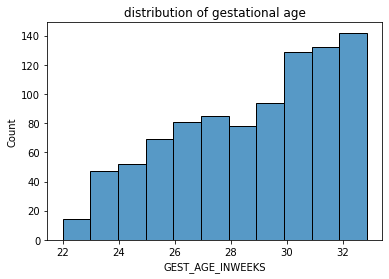

In [26]:
sns.histplot(data=ec_df, x='GEST_AGE_INWEEKS')
plt.title("distribution of gestational age")

Text(0.5, 1.0, 'distribution of birth weight')

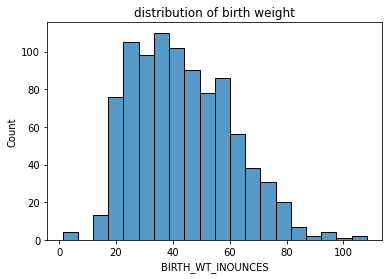

In [31]:
sns.histplot(data=ec_df, x='BIRTH_WT_INOUNCES')
plt.title("distribution of birth weight")

In [28]:
ec_df['RACE'].value_counts()

White                               546
Black or African American           220
Multiple race                        83
Unknown                              45
Asian                                20
American Indian or Alaska Native      5
No Information                        3
Refuse to answer                      1
Name: RACE, dtype: int64

In [29]:
ec_df['GENDER'].value_counts()

Male      529
Female    394
Name: GENDER, dtype: int64

In [33]:
vitals_df

,ENC_ID,RECORDED_DAY,RECORDED_TIME,PULSE,NIBP,BP_S,BP_D,RESP,SPO2
0,572839292,0,09:40:00,140.0,NaN,NaN,NaN,NaN,88.0
1,572839292,0,09:45:00,148.0,NaN,NaN,NaN,NaN,92.0
2,572839292,0,09:50:00,150.0,NaN,NaN,NaN,NaN,94.0
3,572839292,0,09:55:00,154.0,30.0,48.0,22.0,NaN,97.0
4,572839292,0,09:56:00,139.0,32.0,50.0,22.0,NaN,91.0
...,...,...,...,...,...,...,...,...,...
2983734,572840984,26,07:00:00,182.0,NaN,NaN,NaN,NaN,96.0
2983735,572840984,26,08:00:00,181.0,61.0,79.0,50.0,62.0,100.0
2983736,572840984,26,09:00:00,167.0,NaN,NaN,NaN,NaN,99.0
2983737,572840984,26,10:00:00,164.0,NaN,NaN,NaN,NaN,100.0


In [58]:
vitals_df.loc[vitals_df['ENC_ID'] == 572839292].groupby('RECORDED_DAY').mean().reset_index()

,RECORDED_DAY,ENC_ID,PULSE,NIBP,BP_S,BP_D,RESP,SPO2
0,0,572839292.0,152.491525,31.666667,47.333333,24.000000,NaN,93.850000
1,1,572839292.0,156.375000,35.000000,45.000000,30.000000,NaN,92.517857
2,2,572839292.0,153.164948,NaN,NaN,NaN,NaN,92.762887
3,3,572839292.0,162.020408,20.000000,38.000000,11.000000,NaN,95.581633
4,4,572839292.0,169.840426,24.500000,33.000000,19.000000,43.000000,93.308511
...,...,...,...,...,...,...,...,...
160,160,572839292.0,140.920000,43.000000,64.000000,32.333333,41.500000,97.640000
161,161,572839292.0,136.269231,56.000000,91.000000,43.500000,46.444444,97.692308
162,162,572839292.0,135.241379,78.000000,94.500000,68.000000,44.571429,97.647059
163,163,572839292.0,143.500000,42.000000,83.000000,52.000000,40.750000,NaN


In [60]:
patients = list(ec_df['ENC_ID'])
days = list()
avg_daily_spo2s = list()
for patient in patients:
    curr_df = vitals_df.loc[vitals_df['ENC_ID'] == patient]
    curr_avgs = curr_df.groupby('RECORDED_DAY').mean().reset_index()
    avg_daily_spo2s.append(list(curr_avgs['SPO2']))
    days.append(list(curr_avgs['RECORDED_DAY']))

In [61]:
avg_spo2s_df = pd.DataFrame({'RECORDED_DAY': days, 'ENC_ID': patients, 'avg_daily_spo2': avg_daily_spo2s})
avg_spo2s_df

,RECORDED_DAY,ENC_ID,avg_daily_spo2
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",572839292,"[93.85, 92.51785714285714, 92.76288659793815, ..."
1,"[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20...",572839294,"[94.23076923076923, 93.97916666666667, 93.8846..."
2,"[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 3...",572839296,"[97.0, 94.17142857142858, 94.02941176470588, 9..."
3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",572839301,"[91.76190476190476, 91.83673469387755, 92.9183..."
4,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...",572839302,"[93.93103448275862, 91.88, 92.76470588235294, ..."
...,...,...,...
918,"[0, 1]",572840974,"[78.64890282131661, 66.25570776255708]"
919,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]",572840980,"[91.38888888888889, 93.70833333333333, 93.9306..."
920,"[0, 1, 2, 3, 4, 5]",572840981,"[94.8, 96.29787234042553, 97.64583333333333, 9..."
921,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",572840983,"[99.83333333333333, 99.66666666666667, 99.7037..."


PULSE       NIBP       BP_S  BP_D    RESP  \
ENC_ID    RECORDED_DAY                                                   
572839292 0             152.491525  31.666667  47.333333  24.0     NaN   
          1             156.375000  35.000000  45.000000  30.0     NaN   
          2             153.164948        NaN        NaN   NaN     NaN   
          3             162.020408  20.000000  38.000000  11.0     NaN   
          4             169.840426  24.500000  33.000000  19.0  43.000   
...                            ...        ...        ...   ...     ...   
572840984 22            165.920000  51.500000  71.500000  43.5  49.375   
          23            163.600000  51.500000  70.500000  41.5  47.625   
          24            172.666667  52.800000  67.600000  45.6  53.000   
          25            169.458333  50.200000  74.000000  38.6  53.125   
          26            173.000000  60.500000  79.500000  49.0  53.250   

                             SPO2  
ENC_ID    RECORDED_DAY             
572839292 0             93.850000  
          1             92.517857  
          2             92.762887  
          3             95.581633  
          4             93.308511  
...                           ...  
572840984 22            97.840000  
          23            98.708333  
          24            98.875000  
          25            98.833333  
          26            97.166667  

[74296 rows x 6 columns]

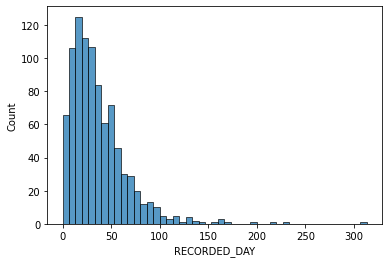

In [66]:
sns.histplot(data=vitals_df.groupby('ENC_ID').mean(), x='RECORDED_DAY')
vitals_df.groupby(['ENC_ID', 'RECORDED_DAY']).mean()

In [73]:
vitals_df.groupby(['RECORDED_DAY', 'ENC_ID']).count()

RECORDED_TIME  PULSE  NIBP  BP_S  BP_D  RESP  SPO2
RECORDED_DAY ENC_ID                                                       
0            572839292             60     59     3     3     3     0    60
             572839301             22     19     4     4     4     2    21
             572839306            228    227     0     0     0     0   228
             572839307            139    137     9     9     9    11   111
             572839311             26     26     7     7     7     5    26
...                               ...    ...   ...   ...   ...   ...   ...
748          572840380              1      1     1     1     1     1     1
749          572840380              7      3     2     2     2     2     7
750          572840380             14     12     2     2     2     2    14
751          572840380              8      7     2     2     2     2     8
752          572840380             10      8     1     1     1     1    10

[74296 rows x 7 columns]

24     11118
25      6408
48      5707
26      4377
49      4243
       ...  
685        1
316        1
353        1
217        1
145        1
Name: RECORDED_TIME, Length: 320, dtype: int64

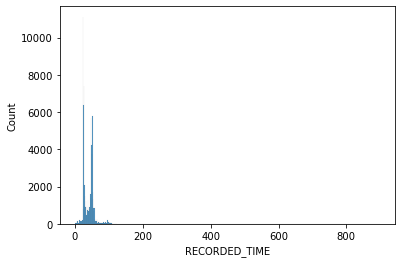

In [72]:
sns.histplot(data=vitals_df.groupby(['RECORDED_DAY', 'ENC_ID']).count(), x='RECORDED_TIME')
vitals_df.groupby(['RECORDED_DAY', 'ENC_ID']).count()['RECORDED_TIME'].value_counts()